So, we have a list of tweets using a particular hashtag. We need to use time and follower relationships

In [1]:
import preprocessing, os, gzip
from config import FOLLOWER_DATA_DIR
import graph_tool.all as gt
from tqdm import tqdm
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates

In [2]:
campaigns = preprocessing.load_campaign()

In [3]:
hashtag = 'jharkhandwithmodi'
tweets = campaigns[hashtag]

In [4]:
len(tweets)

13908

Steps 
1. Sort tweets
2. Go through tweets in reverse order and pick the most recent tweet as the cause if it they are connected

#### Preload following relationships

In [5]:
followers_dict = {}
for tweet in tqdm(tweets.values()):
    user = tweet['username']
    file_name = os.path.join(FOLLOWER_DATA_DIR, user + '.gz')
    if os.path.isfile(file_name):
        f = gzip.open(file_name, 'rb')
        followers = [x.split('\t')[1] for x in f.read().decode().strip().split('\n')]
        followers_dict[user] = set(followers)
    else:
        followers_dict[user] = None

100%|██████████| 13908/13908 [06:53<00:00, 33.64it/s] 


In [11]:
edge_list = []
sorted_tweets = sorted(tweets.values(), key=lambda x: x['date'])[::-1]
for i in tqdm(range(len(sorted_tweets))):
    child = sorted_tweets[i]
    for j in range(i, len(sorted_tweets)):
        #print(sorted_tweets[j]['id'])
        if sorted_tweets[j]['username'] in followers_dict[child['username']]:
            edge_list.append((sorted_tweets[j]['id'], sorted_tweets[i]['id']))
            break
    

  0%|          | 0/13908 [00:00<?, ?it/s]


TypeError: argument of type 'NoneType' is not iterable

In [ ]:
len(edge_list)

## Constructing Cascade

In [6]:
child_to_parent = {j:i for i,j in edge_list}

NameError: name 'edge_list' is not defined

In [ ]:
g = gt.Graph()
#vprop_tweet = g.add_vertex_property('object')
tweet_id_to_vertex = {}
for t in sorted_tweets:
    v = g.add_vertex()
    tweet_id_to_vertex[t['id']] = v
translated_edge_list = [(tweet_id_to_vertex[i], tweet_id_to_vertex[j]) for i,j in edge_list]
g.add_edge_list(translated_edge_list)

In [ ]:
g

In [ ]:
gt.label_components(g, directed=False)[0].a

## What do I want to learn?
1. Create the same histogram for number of descendents.
2. Look at the number of exposures before participating (template and otherwise).

## Looking into amount of exposure before participation

In [12]:
results = {} #username -> (# template, # non-template)
sorted_tweets = sorted(tweets.values(), key=lambda x: x['date'])[::-1]
for i in tqdm(range(len(sorted_tweets))):
    child = sorted_tweets[i]
    n_temp, n_norm = 0, 0
    for j in range(i, len(sorted_tweets)):
        #print(sorted_tweets[j]['id'])
        followers = followers_dict[child['username']]
        if followers is None:
            followers = set()
        if sorted_tweets[j]['username'] in followers:
            if sorted_tweets[j]['template'] != '':
                n_temp += 1
            else:
                n_norm += 1
    results[child['username']] = (n_temp, n_norm)

100%|██████████| 13908/13908 [00:27<00:00, 509.40it/s] 


In [ ]:
results

In [ ]:
temps, norms = zip(*list(results.values()))

In [ ]:
import matplotlib.pyplot as plt, seaborn as sns

In [ ]:
len([x for x,y in followers_dict.items() if y is not None])

In [ ]:
len(sorted_tweets)

In [ ]:
len(followers_dict.items())

## Results removing people without follower data

In [ ]:
len([x for x in tweets.values() if followers_dict[x['username']] is not None])

In [ ]:
len(tweets.values())

In [59]:
x = set()
x.add(2)
x.add(4)
x

{2, 4}

In [60]:
results = {} #username -> (# template, # non-template)
sorted_tweets = sorted(tweets.values(), key=lambda x: x['date'])[::-1]
#sorted_tweets = [x for x in sorted_tweets if followers_dict[x['username']] is not None]
for i in tqdm(range(len(sorted_tweets))):
    child = sorted_tweets[i]
    n_temp, n_norm = 0, 0
    temp_exposers = set()

    for j in range(i, len(sorted_tweets)):
        #print(sorted_tweets[j]['id'])
        followers = followers_dict[sorted_tweets[j]['username']]
        if followers is None:
            followers = set()
        if child['username'] in followers:
            if sorted_tweets[j]['template'] != '':
                n_temp += 1
                temp_exposers.add(sorted_tweets[j]['username'])
            else:
                n_norm += 1
    results[child['username']] = (n_temp, n_norm, child['date'], child['username'], temp_exposers)

100%|██████████| 13908/13908 [00:30<00:00, 462.50it/s] 


In [61]:
temps, norms, dates, users, exposer_sets = zip(*list(results.values()))

## Where do Vertical Lines Come From

In [19]:
from collections import defaultdict

In [62]:
temp_counts = defaultdict(list)
for temp_count, user in zip(temps, exposer_sets):
    temp_counts[temp_count].append(user)

In [63]:
sorted_temp_counts = sorted(temp_counts.items(), key=lambda x: -len(x[1]))

In [64]:
[x for x,y in sorted_temp_counts[:10]]

[0, 146, 4, 1, 54, 7, 5, 151, 158, 6]

In [65]:
temp_counts[146]

[{'bjp4jharkhand'},
 {'bjp4jharkhand'},
 {'bjp4jharkhand'},
 {'bjp4jharkhand'},
 {'bjp4jharkhand'},
 {'bjp4jharkhand'},
 {'bjp4jharkhand'},
 {'bjp4jharkhand'},
 {'bjp4jharkhand'},
 {'bjp4jharkhand'},
 {'bjp4jharkhand'},
 {'bjp4jharkhand'},
 {'bjp4jharkhand'},
 {'bjp4jharkhand'},
 {'bjp4jharkhand'},
 {'bjp4jharkhand'},
 {'bjp4jharkhand'},
 {'bjp4jharkhand'},
 {'bjp4jharkhand'},
 {'bjp4jharkhand'},
 {'bjp4jharkhand'},
 {'bjp4jharkhand'},
 {'bjp4jharkhand'},
 {'bjp4jharkhand'},
 {'bjp4jharkhand'},
 {'bjp4jharkhand'},
 {'bjp4jharkhand'},
 {'bjp4jharkhand'},
 {'bjp4jharkhand'},
 {'bjp4jharkhand'},
 {'bjp4jharkhand'},
 {'bjp4jharkhand'},
 {'bjp4jharkhand'},
 {'bjp4jharkhand'},
 {'bjp4jharkhand'},
 {'bjp4jharkhand'},
 {'bjp4jharkhand'},
 {'bjp4jharkhand'},
 {'bjp4jharkhand'},
 {'bjp4jharkhand'},
 {'bjp4jharkhand'},
 {'bjp4jharkhand'},
 {'bjp4jharkhand'},
 {'bjp4jharkhand'},
 {'bjp4jharkhand'},
 {'bjp4jharkhand'},
 {'bjp4jharkhand'},
 {'bjp4jharkhand'},
 {'bjp4jharkhand'},
 {'bjp4jharkhand'},


In [67]:
set.intersection(*temp_counts[54])

{'vandana63956451'}

In [69]:
set.intersection(*temp_counts[158])

{'bjp4jharkhand'}

In [68]:
set.intersection(*temp_counts[151])

{'bjp4jharkhand'}

In [66]:
set.intersection(*temp_counts[146])

{'bjp4jharkhand'}

In [43]:
# 146 seems to be very common, who is the common denominator
int_set = followers_dict[temp_counts[146][0]]
for x in temp_counts[146][1:]:
    int_set = int_set.intersection(followers_dict[x])

working
error with user manojpo58166346
error with user sahdevmahato
error with user bhaskarbjp1
working
error with user mlgaurav
working
working
error with user bhardwajd977
working
working
error with user thesmartbokaro
working
working
error with user hemantbjp3
working
working
error with user priyawartkumar8
error with user sanjayg79530411
working
error with user belalzahid
error with user vishalskumarpa1
error with user birendrasingh_2
error with user abhaymishra09
error with user dtatawala
working
working
error with user akhileshmbjp
working
error with user shubhamrajbjp
error with user singhsaheb123
error with user pawan072015
working
error with user dasgupta_sujay
working
working
working
error with user bjp4siliguri
working
working
working
working
error with user maassaw
error with user bishwan49924717
working
working
working
working
error with user abishekshukla22
error with user arvindbrar3
error with user iampawansingh26
error with user ompraka13500322
error with user ajaykr_

(array([1.546e+03, 9.900e+01, 1.400e+01, 2.960e+02, 5.200e+01, 5.300e+01,
        9.000e+00, 2.600e+01, 1.300e+01, 1.200e+01, 6.000e+00, 8.000e+00,
        5.000e+00, 1.000e+00, 1.100e+01, 5.000e+00, 3.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 3.000e+00, 6.000e+00, 3.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([   0.,   42.,   84.,  126.,  168.,  210.,  252.,  294.,  336.,
         378.,  420.,  462.,  504.,  546.,  588.,  630.,  672.,  714.,
         756.,  798.,  840.,  882.,  924.,  966., 1008., 1050., 1092.,
        1134., 1176., 1218., 1260., 1302., 1344., 1386., 1428., 1470.,
        1512., 1554., 1596., 1638., 1680., 1722., 1764., 1806., 1848.,
        1890., 1932.,

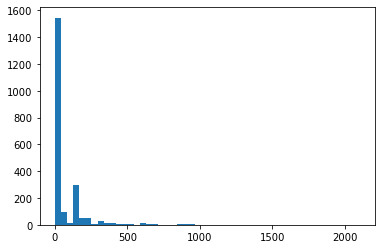

In [17]:
plt.hist(temps, bins=50)

Text(0.5, 1.0, 'Tweets by Time')

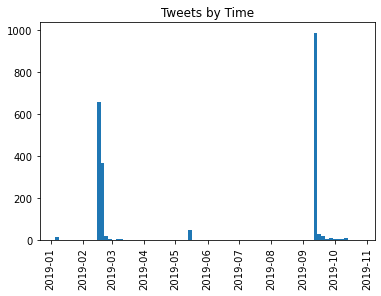

In [16]:
plt.hist(dates, bins=80)
plt.xticks(rotation=90)
plt.title('Tweets by Time')

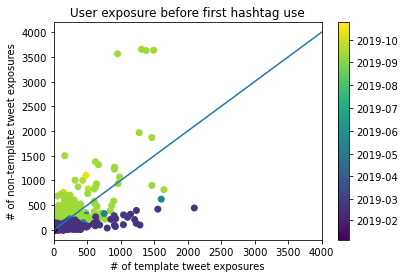

In [17]:

t = [mdates.date2num(d) for d in dates]

fig, ax = plt.subplots()
sc = ax.scatter(temps, norms, c=t)

loc = mdates.AutoDateLocator()
fig.colorbar(sc, ticks=loc,
                 format=mdates.AutoDateFormatter(loc))

plt.title('User exposure before first hashtag use')
plt.xlabel('# of template tweet exposures')
plt.ylabel('# of non-template tweet exposures')
plt.xlim([0, 4000])
plt.plot([0,4000],[0,4000],'-')
# plt.xscale('log')
# plt.yscale('log')

plt.show()

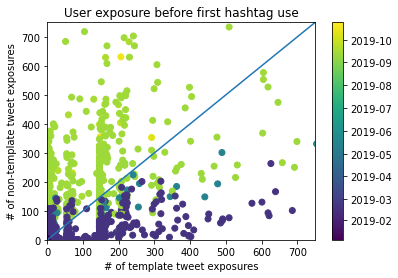

In [18]:
t = [mdates.date2num(d) for d in dates]

fig, ax = plt.subplots()
sc = ax.scatter(temps, norms, c=t)

loc = mdates.AutoDateLocator()
fig.colorbar(sc, ticks=loc,
                 format=mdates.AutoDateFormatter(loc))

plt.title('User exposure before first hashtag use')
plt.xlabel('# of template tweet exposures')
plt.ylabel('# of non-template tweet exposures')
plt.xlim([0, 4000])
plt.plot([0,4000],[0,4000],'-')
# plt.xscale('log')
# plt.yscale('log')

plt.ylim([0, 750])
plt.xlim([0, 750])
plt.show()
# plt.xscale('log')
# plt.yscale('log')

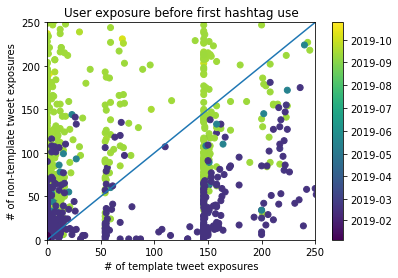

In [19]:
t = [mdates.date2num(d) for d in dates]

fig, ax = plt.subplots()
sc = ax.scatter(temps, norms, c=t)

loc = mdates.AutoDateLocator()
fig.colorbar(sc, ticks=loc,
                 format=mdates.AutoDateFormatter(loc))

plt.title('User exposure before first hashtag use')
plt.xlabel('# of template tweet exposures')
plt.ylabel('# of non-template tweet exposures')
plt.xlim([0, 4000])
plt.plot([0,4000],[0,4000],'-')

plt.ylim([0, 250])
plt.xlim([0, 250])
plt.show()


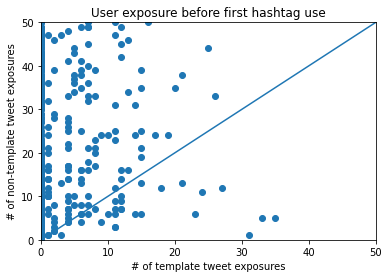

In [20]:
plt.scatter(temps, norms)
plt.title('User exposure before first hashtag use')
plt.xlabel('# of template tweet exposures')
plt.ylabel('# of non-template tweet exposures')
plt.ylim([0, 50])
plt.xlim([0, 50])
plt.plot([0,4000],[0,4000],'-')
# plt.xscale('log')
# plt.yscale('log')

Text(0.5, 1.0, 'Total Exposures by Tweet Type')

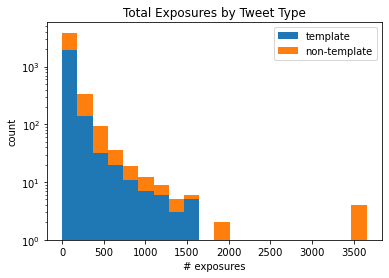

In [21]:
plt.hist([temps, norms], stacked=True, log=True, bins=20, label=['template', 'non-template'])
plt.legend()
plt.xlabel('# exposures')
plt.ylabel('count')
plt.title('Total Exposures by Tweet Type')

## Examining Second Half of Tweets

In [22]:
begin, end = datetime(2019,9,1), datetime(2019,9, 13) #month of september
filtered_results = [(x,y,z) for x,y,z in zip(temps, norms, dates) if z > begin and z < end]
f_temps, f_norms, f_dates = zip(*filtered_results)

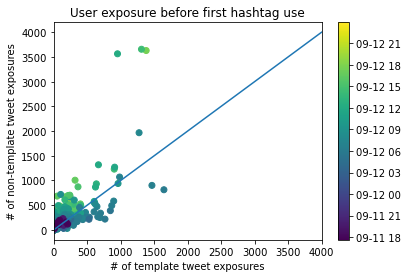

In [23]:
t = [mdates.date2num(d) for d in f_dates]

fig, ax = plt.subplots()
sc = ax.scatter(f_temps, f_norms, c=t)

loc = mdates.AutoDateLocator()
fig.colorbar(sc, ticks=loc,
                 format=mdates.AutoDateFormatter(loc))

plt.title('User exposure before first hashtag use')
plt.xlabel('# of template tweet exposures')
plt.ylabel('# of non-template tweet exposures')
plt.xlim([0, 4000])
plt.plot([0,4000],[0,4000],'-')
# plt.xscale('log')
# plt.yscale('log')

plt.show()

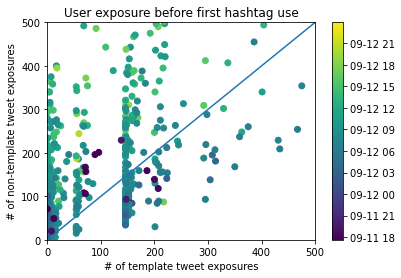

In [24]:
t = [mdates.date2num(d) for d in f_dates]

fig, ax = plt.subplots()
sc = ax.scatter(f_temps, f_norms, c=t)

loc = mdates.AutoDateLocator()
fig.colorbar(sc, ticks=loc,
                 format=mdates.AutoDateFormatter(loc))

plt.title('User exposure before first hashtag use')
plt.xlabel('# of template tweet exposures')
plt.ylabel('# of non-template tweet exposures')
plt.xlim([0, 500])
plt.ylim([0, 500])

plt.plot([0,4000],[0,4000],'-')
# plt.xscale('log')
# plt.yscale('log')

plt.show()

Text(0.5, 1.0, 'Total Exposures by Tweet Type')

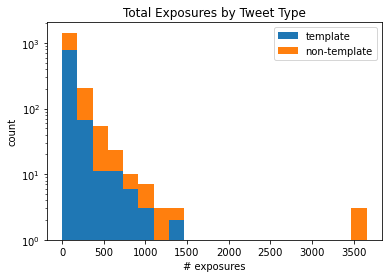

In [25]:
plt.hist([f_temps, f_norms], stacked=True, log=True, bins=20, label=['template', 'non-template'])
plt.legend()
plt.xlabel('# exposures')
plt.ylabel('count')
plt.title('Total Exposures by Tweet Type')

Text(0.5, 0, '# of template exposures')

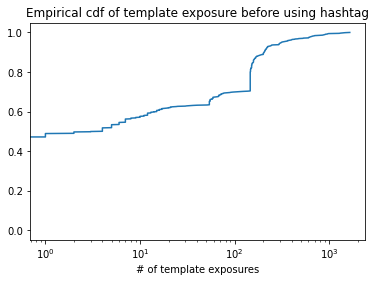

In [26]:
ecdf = ECDF(f_temps)
plt.plot(ecdf.x, ecdf.y)
plt.xscale('log')
plt.title('Empirical cdf of template exposure before using hashtag')
plt.xlabel('# of template exposures')

Text(0.5, 0, '# of non-template exposures')

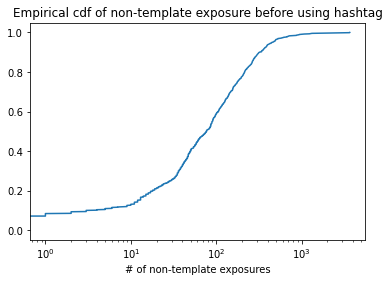

In [27]:
ecdf = ECDF(f_norms)
plt.plot(ecdf.x, ecdf.y)
plt.xscale('log')
plt.title('Empirical cdf of non-template exposure before using hashtag')
plt.xlabel('# of non-template exposures')

Text(0.5, 0, '# of exposures')

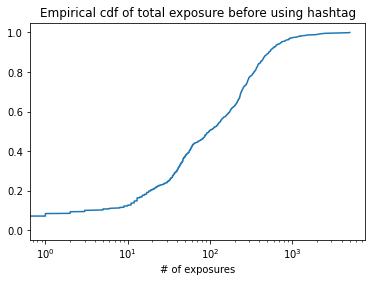

In [28]:
ecdf = ECDF([x+y for x,y in zip(f_temps,f_norms)])
plt.plot(ecdf.x, ecdf.y)
plt.xscale('log')
plt.title('Empirical cdf of total exposure before using hashtag')
plt.xlabel('# of exposures')

## Examining First Half of Tweets

In [29]:
begin, end = datetime(2019,2,10), datetime(2019,2,20) #month of february
filtered_results = [(x,y,z) for x,y,z in zip(temps, norms, dates) if z > begin and z < end]
f_temps, f_norms, f_dates = zip(*filtered_results)

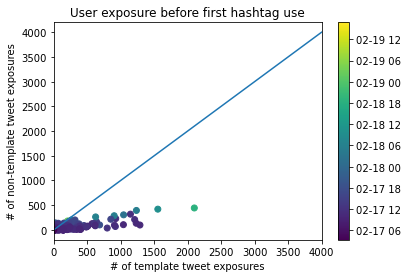

In [30]:
t = [mdates.date2num(d) for d in f_dates]

fig, ax = plt.subplots()
sc = ax.scatter(f_temps, f_norms, c=t)

loc = mdates.AutoDateLocator()
fig.colorbar(sc, ticks=loc,
                 format=mdates.AutoDateFormatter(loc))

plt.title('User exposure before first hashtag use')
plt.xlabel('# of template tweet exposures')
plt.ylabel('# of non-template tweet exposures')
plt.xlim([0, 4000])
plt.plot([0,4000],[0,4000],'-')
# plt.xscale('log')
# plt.yscale('log')

plt.show()

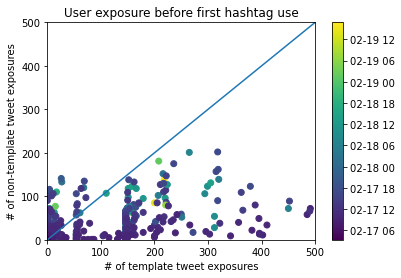

In [31]:
t = [mdates.date2num(d) for d in f_dates]

fig, ax = plt.subplots()
sc = ax.scatter(f_temps, f_norms, c=t)

loc = mdates.AutoDateLocator()
fig.colorbar(sc, ticks=loc,
                 format=mdates.AutoDateFormatter(loc))

plt.title('User exposure before first hashtag use')
plt.xlabel('# of template tweet exposures')
plt.ylabel('# of non-template tweet exposures')
plt.xlim([0, 500])
plt.ylim([0, 500])

plt.plot([0,4000],[0,4000],'-')
# plt.xscale('log')
# plt.yscale('log')

plt.show()

Text(0.5, 1.0, 'Total Exposures by Tweet Type')

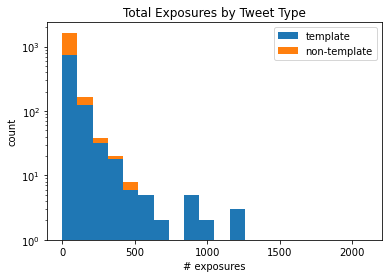

In [32]:
plt.hist([f_temps, f_norms], stacked=True, log=True, bins=20, label=['template', 'non-template'])
plt.legend()
plt.xlabel('# exposures')
plt.ylabel('count')
plt.title('Total Exposures by Tweet Type')

Text(0.5, 0, '# of template exposures')

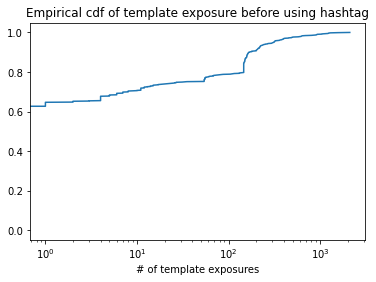

In [33]:
ecdf = ECDF(f_temps)
plt.plot(ecdf.x, ecdf.y)
plt.xscale('log')
plt.title('Empirical cdf of template exposure before using hashtag')
plt.xlabel('# of template exposures')

Text(0.5, 0, '# of non-template exposures')

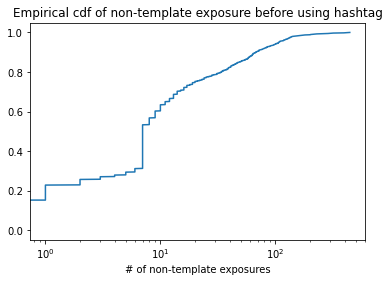

In [34]:
ecdf = ECDF(f_norms)
plt.plot(ecdf.x, ecdf.y)
plt.xscale('log')
plt.title('Empirical cdf of non-template exposure before using hashtag')
plt.xlabel('# of non-template exposures')

Text(0.5, 0, '# of exposures')

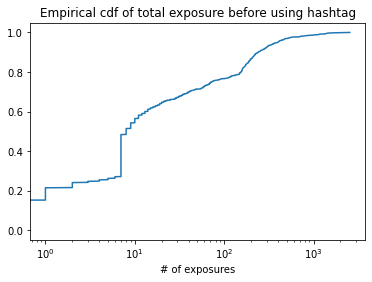

In [35]:
ecdf = ECDF([x+y for x,y in zip(f_temps,f_norms)])
plt.plot(ecdf.x, ecdf.y)
plt.xscale('log')
plt.title('Empirical cdf of total exposure before using hashtag')
plt.xlabel('# of exposures')

# Only looking at non-template tweets

In [86]:
results = {} #username -> (# template, # non-template)
sorted_tweets = sorted(tweets.values(), key=lambda x: x['date'])[::-1]
#sorted_tweets = [x for x in sorted_tweets if followers_dict[x['username']] is not None]
for i in tqdm(range(len(sorted_tweets))):
    child = sorted_tweets[i]
    n_temp, n_norm = 0, 0
    for j in range(i, len(sorted_tweets)):
        #print(sorted_tweets[j]['id'])
        followers = followers_dict[sorted_tweets[j]['username']]
        if followers is None:
            followers = set()
        if child['username'] in followers:
            if sorted_tweets[j]['template'] != '':
                n_temp += 1
            else:
                n_norm += 1
    if child['template'] == '':
        results[child['username']] = (n_temp, n_norm, child['date'])

100%|██████████| 13908/13908 [00:33<00:00, 421.09it/s] 


In [87]:
temps, norms, dates = zip(*list(results.values()))

Text(0.5, 1.0, 'Tweets by Time')

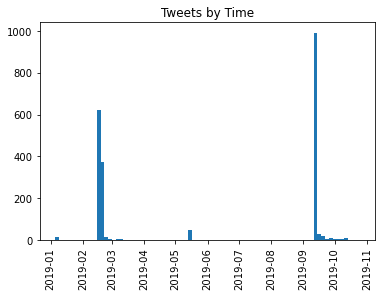

In [38]:
plt.hist(dates, bins=80)
plt.xticks(rotation=90)
plt.title('Tweets by Time')

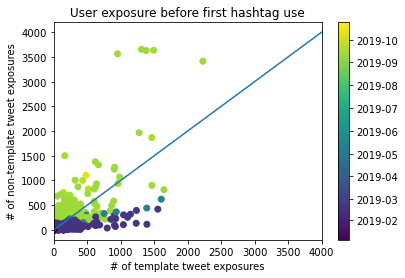

In [39]:

t = [mdates.date2num(d) for d in dates]

fig, ax = plt.subplots()
sc = ax.scatter(temps, norms, c=t)

loc = mdates.AutoDateLocator()
fig.colorbar(sc, ticks=loc,
                 format=mdates.AutoDateFormatter(loc))

plt.title('User exposure before first hashtag use')
plt.xlabel('# of template tweet exposures')
plt.ylabel('# of non-template tweet exposures')
plt.xlim([0, 4000])
plt.plot([0,4000],[0,4000],'-')
# plt.xscale('log')
# plt.yscale('log')

plt.show()

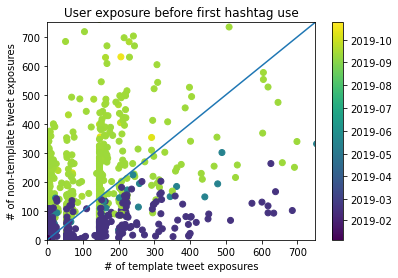

In [40]:
t = [mdates.date2num(d) for d in dates]

fig, ax = plt.subplots()
sc = ax.scatter(temps, norms, c=t)

loc = mdates.AutoDateLocator()
fig.colorbar(sc, ticks=loc,
                 format=mdates.AutoDateFormatter(loc))

plt.title('User exposure before first hashtag use')
plt.xlabel('# of template tweet exposures')
plt.ylabel('# of non-template tweet exposures')
plt.xlim([0, 4000])
plt.plot([0,4000],[0,4000],'-')
# plt.xscale('log')
# plt.yscale('log')

plt.ylim([0, 750])
plt.xlim([0, 750])
plt.show()
# plt.xscale('log')
# plt.yscale('log')

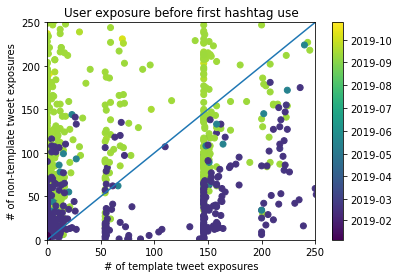

In [41]:
t = [mdates.date2num(d) for d in dates]

fig, ax = plt.subplots()
sc = ax.scatter(temps, norms, c=t)

loc = mdates.AutoDateLocator()
fig.colorbar(sc, ticks=loc,
                 format=mdates.AutoDateFormatter(loc))

plt.title('User exposure before first hashtag use')
plt.xlabel('# of template tweet exposures')
plt.ylabel('# of non-template tweet exposures')
plt.xlim([0, 4000])
plt.plot([0,4000],[0,4000],'-')

plt.ylim([0, 250])
plt.xlim([0, 250])
plt.show()


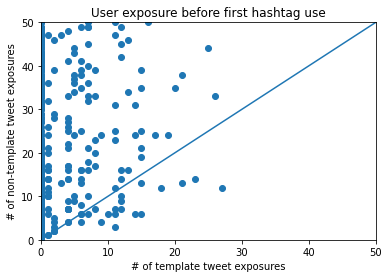

In [42]:
plt.scatter(temps, norms)
plt.title('User exposure before first hashtag use')
plt.xlabel('# of template tweet exposures')
plt.ylabel('# of non-template tweet exposures')
plt.ylim([0, 50])
plt.xlim([0, 50])
plt.plot([0,4000],[0,4000],'-')
# plt.xscale('log')
# plt.yscale('log')

Text(0.5, 1.0, 'Total Exposures by Tweet Type')

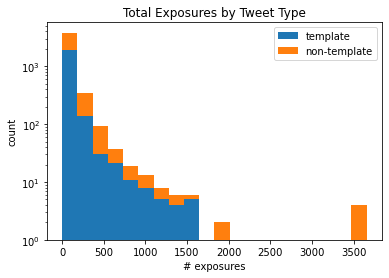

In [43]:
plt.hist([temps, norms], stacked=True, log=True, bins=20, label=['template', 'non-template'])
plt.legend()
plt.xlabel('# exposures')
plt.ylabel('count')
plt.title('Total Exposures by Tweet Type')

## Examining Second Half of Tweets

In [44]:
begin, end = datetime(2019,9,1), datetime(2019,9, 13) #month of september
filtered_results = [(x,y,z) for x,y,z in zip(temps, norms, dates) if z > begin and z < end]
f_temps, f_norms, f_dates = zip(*filtered_results)

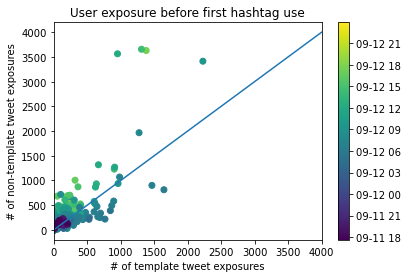

In [45]:
t = [mdates.date2num(d) for d in f_dates]

fig, ax = plt.subplots()
sc = ax.scatter(f_temps, f_norms, c=t)

loc = mdates.AutoDateLocator()
fig.colorbar(sc, ticks=loc,
                 format=mdates.AutoDateFormatter(loc))

plt.title('User exposure before first hashtag use')
plt.xlabel('# of template tweet exposures')
plt.ylabel('# of non-template tweet exposures')
plt.xlim([0, 4000])
plt.plot([0,4000],[0,4000],'-')
# plt.xscale('log')
# plt.yscale('log')

plt.show()

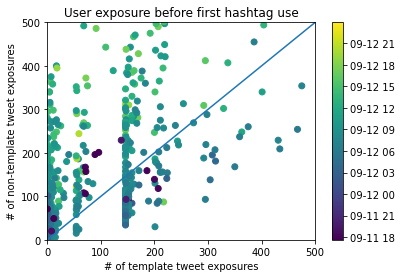

In [46]:
t = [mdates.date2num(d) for d in f_dates]

fig, ax = plt.subplots()
sc = ax.scatter(f_temps, f_norms, c=t)

loc = mdates.AutoDateLocator()
fig.colorbar(sc, ticks=loc,
                 format=mdates.AutoDateFormatter(loc))

plt.title('User exposure before first hashtag use')
plt.xlabel('# of template tweet exposures')
plt.ylabel('# of non-template tweet exposures')
plt.xlim([0, 500])
plt.ylim([0, 500])

plt.plot([0,4000],[0,4000],'-')
# plt.xscale('log')
# plt.yscale('log')

plt.show()

Text(0.5, 1.0, 'Total Exposures by Tweet Type')

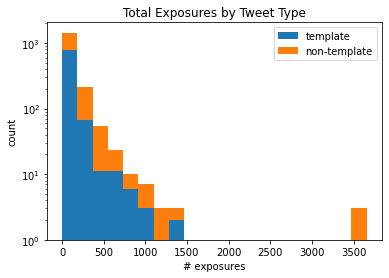

In [47]:
plt.hist([f_temps, f_norms], stacked=True, log=True, bins=20, label=['template', 'non-template'])
plt.legend()
plt.xlabel('# exposures')
plt.ylabel('count')
plt.title('Total Exposures by Tweet Type')

Text(0.5, 0, '# of template exposures')

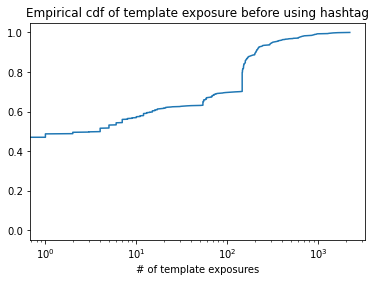

In [48]:
ecdf = ECDF(f_temps)
plt.plot(ecdf.x, ecdf.y)
plt.xscale('log')
plt.title('Empirical cdf of template exposure before using hashtag')
plt.xlabel('# of template exposures')

Text(0.5, 0, '# of non-template exposures')

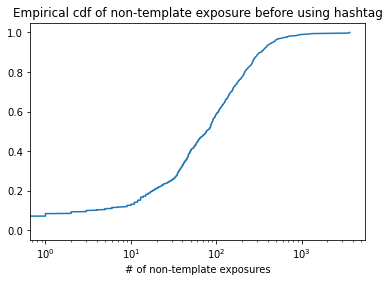

In [49]:
ecdf = ECDF(f_norms)
plt.plot(ecdf.x, ecdf.y)
plt.xscale('log')
plt.title('Empirical cdf of non-template exposure before using hashtag')
plt.xlabel('# of non-template exposures')

Text(0.5, 0, '# of exposures')

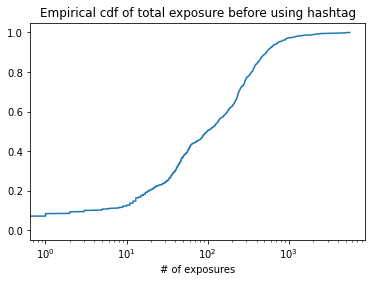

In [50]:
ecdf = ECDF([x+y for x,y in zip(f_temps,f_norms)])
plt.plot(ecdf.x, ecdf.y)
plt.xscale('log')
plt.title('Empirical cdf of total exposure before using hashtag')
plt.xlabel('# of exposures')

## Examining First Half of Tweets

In [51]:
begin, end = datetime(2019,2,10), datetime(2019,2,20) #month of february
filtered_results = [(x,y,z) for x,y,z in zip(temps, norms, dates) if z > begin and z < end]
f_temps, f_norms, f_dates = zip(*filtered_results)

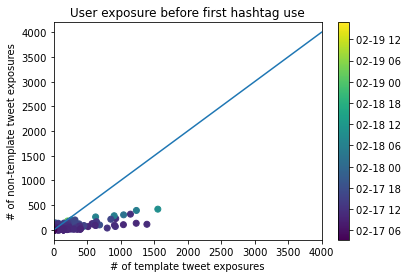

In [52]:
t = [mdates.date2num(d) for d in f_dates]

fig, ax = plt.subplots()
sc = ax.scatter(f_temps, f_norms, c=t)

loc = mdates.AutoDateLocator()
fig.colorbar(sc, ticks=loc,
                 format=mdates.AutoDateFormatter(loc))

plt.title('User exposure before first hashtag use')
plt.xlabel('# of template tweet exposures')
plt.ylabel('# of non-template tweet exposures')
plt.xlim([0, 4000])
plt.plot([0,4000],[0,4000],'-')
# plt.xscale('log')
# plt.yscale('log')

plt.show()

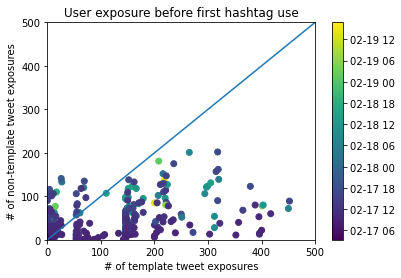

In [53]:
t = [mdates.date2num(d) for d in f_dates]

fig, ax = plt.subplots()
sc = ax.scatter(f_temps, f_norms, c=t)

loc = mdates.AutoDateLocator()
fig.colorbar(sc, ticks=loc,
                 format=mdates.AutoDateFormatter(loc))

plt.title('User exposure before first hashtag use')
plt.xlabel('# of template tweet exposures')
plt.ylabel('# of non-template tweet exposures')
plt.xlim([0, 500])
plt.ylim([0, 500])

plt.plot([0,4000],[0,4000],'-')
# plt.xscale('log')
# plt.yscale('log')

plt.show()

Text(0.5, 1.0, 'Total Exposures by Tweet Type')

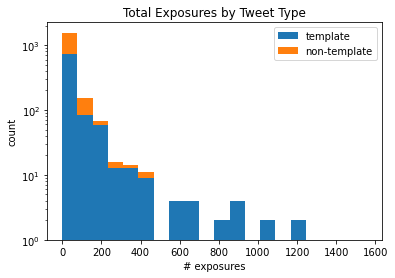

In [54]:
plt.hist([f_temps, f_norms], stacked=True, log=True, bins=20, label=['template', 'non-template'])
plt.legend()
plt.xlabel('# exposures')
plt.ylabel('count')
plt.title('Total Exposures by Tweet Type')

Text(0.5, 0, '# of template exposures')

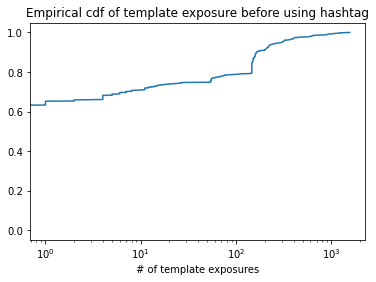

In [55]:
ecdf = ECDF(f_temps)
plt.plot(ecdf.x, ecdf.y)
plt.xscale('log')
plt.title('Empirical cdf of template exposure before using hashtag')
plt.xlabel('# of template exposures')

Text(0.5, 0, '# of non-template exposures')

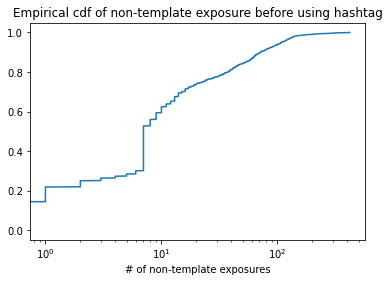

In [56]:
ecdf = ECDF(f_norms)
plt.plot(ecdf.x, ecdf.y)
plt.xscale('log')
plt.title('Empirical cdf of non-template exposure before using hashtag')
plt.xlabel('# of non-template exposures')

Text(0.5, 0, '# of exposures')

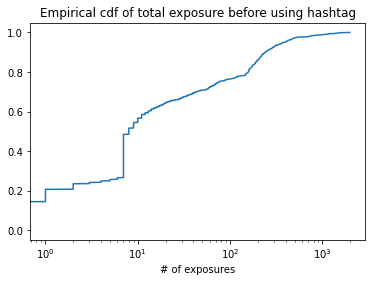

In [57]:
ecdf = ECDF([x+y for x,y in zip(f_temps,f_norms)])
plt.plot(ecdf.x, ecdf.y)
plt.xscale('log')
plt.title('Empirical cdf of total exposure before using hashtag')
plt.xlabel('# of exposures')

# Distribution of Template Tweets

In [58]:
results = {} #username -> (# template, # non-template)
sorted_tweets = sorted(tweets.values(), key=lambda x: x['date'])[::-1]
#sorted_tweets = [x for x in sorted_tweets if followers_dict[x['username']] is not None]
for i in tqdm(range(len(sorted_tweets))):
    child = sorted_tweets[i]
    n_temp, n_norm = 0, 0
    for j in range(i, len(sorted_tweets)):
        #print(sorted_tweets[j]['id'])
        followers = followers_dict[sorted_tweets[j]['username']]
        if followers is None:
            followers = set()
        if child['username'] in followers:
            if sorted_tweets[j]['template'] != '':
                n_temp += 1
            else:
                n_norm += 1
    if child['template'] != '':
        results[child['username']] = (n_temp, n_norm, child['date'])

100%|██████████| 13908/13908 [00:33<00:00, 416.32it/s] 


In [59]:
temps, norms, dates = zip(*list(results.values()))

Text(0.5, 1.0, 'Tweets by Time')

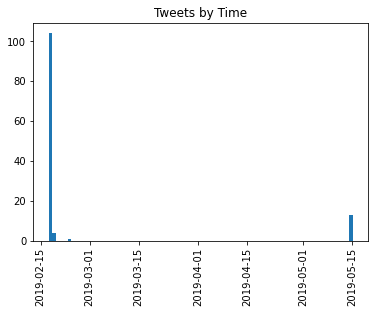

In [60]:
plt.hist(dates, bins=80)
plt.xticks(rotation=90)
plt.title('Tweets by Time')

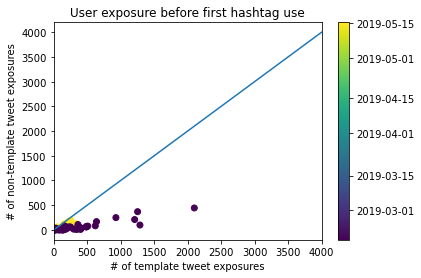

In [61]:

t = [mdates.date2num(d) for d in dates]

fig, ax = plt.subplots()
sc = ax.scatter(temps, norms, c=t)

loc = mdates.AutoDateLocator()
fig.colorbar(sc, ticks=loc,
                 format=mdates.AutoDateFormatter(loc))

plt.title('User exposure before first hashtag use')
plt.xlabel('# of template tweet exposures')
plt.ylabel('# of non-template tweet exposures')
plt.xlim([0, 4000])
plt.plot([0,4000],[0,4000],'-')
# plt.xscale('log')
# plt.yscale('log')

plt.show()

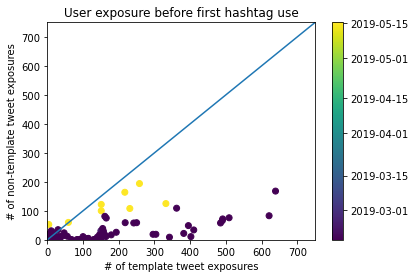

In [62]:
t = [mdates.date2num(d) for d in dates]

fig, ax = plt.subplots()
sc = ax.scatter(temps, norms, c=t)

loc = mdates.AutoDateLocator()
fig.colorbar(sc, ticks=loc,
                 format=mdates.AutoDateFormatter(loc))

plt.title('User exposure before first hashtag use')
plt.xlabel('# of template tweet exposures')
plt.ylabel('# of non-template tweet exposures')
plt.xlim([0, 4000])
plt.plot([0,4000],[0,4000],'-')
# plt.xscale('log')
# plt.yscale('log')

plt.ylim([0, 750])
plt.xlim([0, 750])
plt.show()
# plt.xscale('log')
# plt.yscale('log')

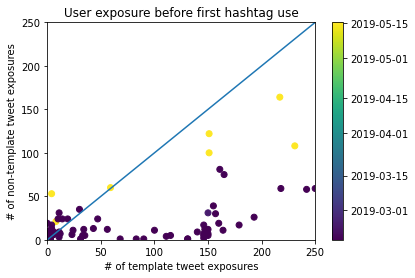

In [63]:
t = [mdates.date2num(d) for d in dates]

fig, ax = plt.subplots()
sc = ax.scatter(temps, norms, c=t)

loc = mdates.AutoDateLocator()
fig.colorbar(sc, ticks=loc,
                 format=mdates.AutoDateFormatter(loc))

plt.title('User exposure before first hashtag use')
plt.xlabel('# of template tweet exposures')
plt.ylabel('# of non-template tweet exposures')
plt.xlim([0, 4000])
plt.plot([0,4000],[0,4000],'-')

plt.ylim([0, 250])
plt.xlim([0, 250])
plt.show()


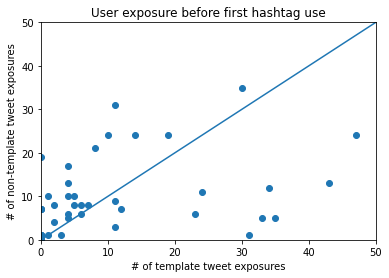

In [64]:
plt.scatter(temps, norms)
plt.title('User exposure before first hashtag use')
plt.xlabel('# of template tweet exposures')
plt.ylabel('# of non-template tweet exposures')
plt.ylim([0, 50])
plt.xlim([0, 50])
plt.plot([0,4000],[0,4000],'-')
# plt.xscale('log')
# plt.yscale('log')

Text(0.5, 1.0, 'Total Exposures by Tweet Type')

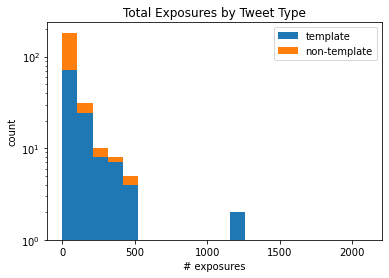

In [65]:
plt.hist([temps, norms], stacked=True, log=True, bins=20, label=['template', 'non-template'])
plt.legend()
plt.xlabel('# exposures')
plt.ylabel('count')
plt.title('Total Exposures by Tweet Type')

## Examining Second Half of Tweets
There were none

## Examining First Half of Tweets

In [66]:
begin, end = datetime(2019,2,10), datetime(2019,2,20) #month of february
filtered_results = [(x,y,z) for x,y,z in zip(temps, norms, dates) if z > begin and z < end]
f_temps, f_norms, f_dates = zip(*filtered_results)

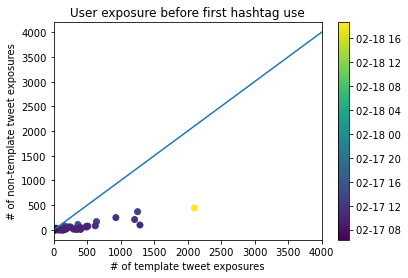

In [67]:
t = [mdates.date2num(d) for d in f_dates]

fig, ax = plt.subplots()
sc = ax.scatter(f_temps, f_norms, c=t)

loc = mdates.AutoDateLocator()
fig.colorbar(sc, ticks=loc,
                 format=mdates.AutoDateFormatter(loc))

plt.title('User exposure before first hashtag use')
plt.xlabel('# of template tweet exposures')
plt.ylabel('# of non-template tweet exposures')
plt.xlim([0, 4000])
plt.plot([0,4000],[0,4000],'-')
# plt.xscale('log')
# plt.yscale('log')

plt.show()

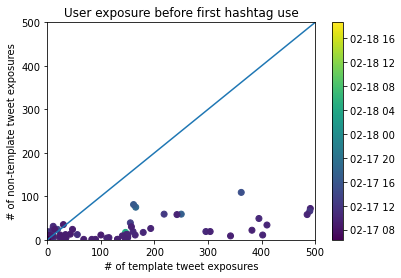

In [68]:
t = [mdates.date2num(d) for d in f_dates]

fig, ax = plt.subplots()
sc = ax.scatter(f_temps, f_norms, c=t)

loc = mdates.AutoDateLocator()
fig.colorbar(sc, ticks=loc,
                 format=mdates.AutoDateFormatter(loc))

plt.title('User exposure before first hashtag use')
plt.xlabel('# of template tweet exposures')
plt.ylabel('# of non-template tweet exposures')
plt.xlim([0, 500])
plt.ylim([0, 500])

plt.plot([0,4000],[0,4000],'-')
# plt.xscale('log')
# plt.yscale('log')

plt.show()

Text(0.5, 1.0, 'Total Exposures by Tweet Type')

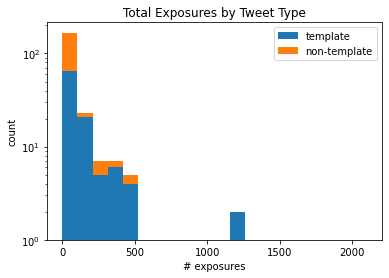

In [69]:
plt.hist([f_temps, f_norms], stacked=True, log=True, bins=20, label=['template', 'non-template'])
plt.legend()
plt.xlabel('# exposures')
plt.ylabel('count')
plt.title('Total Exposures by Tweet Type')

Text(0.5, 0, '# of template exposures')

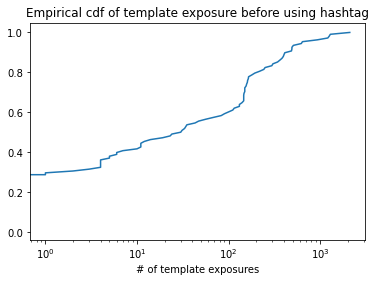

In [70]:
ecdf = ECDF(f_temps)
plt.plot(ecdf.x, ecdf.y)
plt.xscale('log')
plt.title('Empirical cdf of template exposure before using hashtag')
plt.xlabel('# of template exposures')

Text(0.5, 0, '# of non-template exposures')

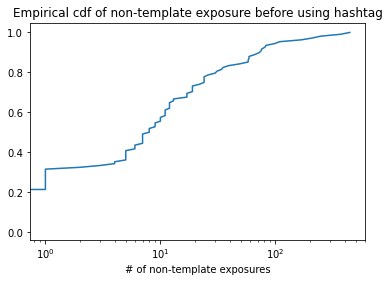

In [71]:
ecdf = ECDF(f_norms)
plt.plot(ecdf.x, ecdf.y)
plt.xscale('log')
plt.title('Empirical cdf of non-template exposure before using hashtag')
plt.xlabel('# of non-template exposures')

Text(0.5, 0, '# of exposures')

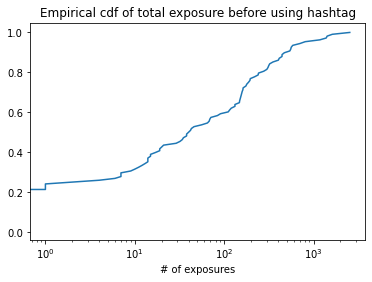

In [72]:
ecdf = ECDF([x+y for x,y in zip(f_temps,f_norms)])
plt.plot(ecdf.x, ecdf.y)
plt.xscale('log')
plt.title('Empirical cdf of total exposure before using hashtag')
plt.xlabel('# of exposures')

## Who are the second wave non-template tweeters?

In [73]:
sorted_tweets = sorted(tweets.values(), key=lambda x: x['date'])[::-1]
begin, end = datetime(2019,9,1), datetime(2019,9, 13) #month of september]
filtered_tweets = [t for t in tweets.values() if t['date'] >= begin and t['date'] <= end] 

In [74]:
user_df = preprocessing.load_user_data()
user_df.head()

,templates,template_retweets,tweets,retweets,campaigns,id,location,description,followers,friends,statuses,type,new_description,temp,group
4bhi9,0,0,4,27,0,NaN,NaN,NaN,NaN,NaN,NaN,6_non-participant,None,non-participant,0
advrayadav,0,0,0,14,0,68160779,"uttar pradesh & delhi , india","advocate supreme court of india, national pres...",11560,12591,24663,6_non-participant,None,non-participant,0
deepsethi01,13,40,23,195,4,773812588228534272,"kota,rajasthan",loksabha vice coordinator bjp .blessed to be f...,1680,923,72646,2_official,Loksabha Vice Coordinator BJP .\n\nBlessed to ...,loksabha vice coordin bjp bless to be follow ...,3-5
desh_bhkt,0,0,24,33,0,1465206535,dabru dabru dabru.hahahaha.com,make fun of life before it starts making fun o...,23672,135,116912,6_non-participant,None,non-participant,0
devendrapai,0,0,12,7,0,53862134,amchi mumbai,course director at rmp's @iidlpgp. swayamsevak...,7398,990,45891,6_non-participant,None,non-participant,0


In [75]:
import numpy as np

In [76]:
users = np.unique([t['username'] for t in filtered_tweets])
user_types = [user_df.type.get(u, 'Unknown') for u in users] 

In [77]:
import pandas as pd

In [78]:
counts = pd.Series(user_types).value_counts()
normed = [x/sum(counts) for x in counts]

['black', 'g', 'b', 'r', 'orange', 'pink']

Text(0.5, 1.0, 'User Breakdown of Second Wave Participants')

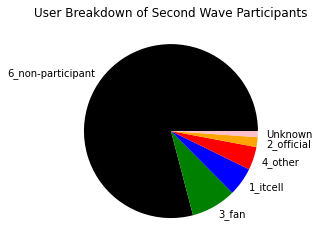

In [112]:
plt.pie(normed, labels=counts.index, colors=[color_map[x] for x in counts.index])
plt.title('User Breakdown of Second Wave Participants')

## Who are the first wave non-template tweeters?

In [131]:
sorted_tweets = sorted(tweets.values(), key=lambda x: x['date'])[::-1]
begin, end = datetime(2019,2,10), datetime(2019,2,20) #month of february
filtered_tweets = [t for t in tweets.values() if t['date'] >= begin and t['date'] <= end and t['template'] == ''] 

In [132]:
users = np.unique([t['username'] for t in filtered_tweets])
user_types = [user_df.type.get(u, 'Unknown') for u in users] 

In [133]:
import pandas as pd

In [134]:
counts = pd.Series(user_types).value_counts()
normed = [x/sum(counts) for x in counts]

Text(0.5, 1.0, 'User Breakdown of First Wave Participants')

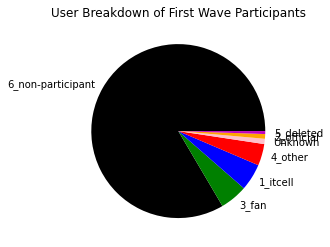

In [135]:
plt.pie(normed, labels=counts.index, colors=[color_map[x] for x in counts.index])
plt.title('User Breakdown of First Wave Participants')

## Plotting Breakdown Colored by User Type

In [104]:
color_map = {
    '1_itcell': 'b',
    '2_official': 'orange',
    '3_fan': 'g',
    '4_other': 'r',
    '5_deleted': 'm',
    '6_non-participant': 'black',
    'Unknown': 'pink'
}

In [105]:
results = {} #username -> (# template, # non-template)
sorted_tweets = sorted(tweets.values(), key=lambda x: x['date'])[::-1]
#sorted_tweets = [x for x in sorted_tweets if followers_dict[x['username']] is not None]
for i in tqdm(range(len(sorted_tweets))):
    child = sorted_tweets[i]
    n_temp, n_norm = 0, 0
    for j in range(i, len(sorted_tweets)):
        #print(sorted_tweets[j]['id'])
        followers = followers_dict[sorted_tweets[j]['username']]
        if followers is None:
            followers = set()
        if child['username'] in followers:
            if sorted_tweets[j]['template'] != '':
                n_temp += 1
            else:
                n_norm += 1
    results[child['username']] = (n_temp, n_norm, child['date'], child['username'])

100%|██████████| 13908/13908 [00:33<00:00, 419.77it/s] 


In [106]:
temps, norms, dates, usernames = zip(*list(results.values()))

In [107]:
begin, end = datetime(2019,9,1), datetime(2019,9, 13) #month of september
filtered_results = [(x,y,z, a) for x,y,z,a in zip(temps, norms, dates, usernames) if z > begin and z < end]
f_temps, f_norms, f_dates, f_usernames = zip(*filtered_results)

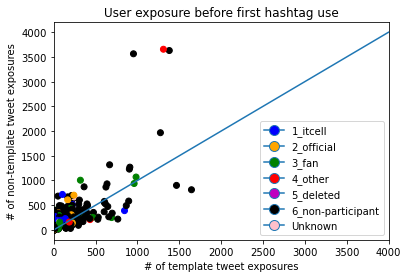

In [108]:
#t = [mdates.date2num(d) for d in f_dates]
cs = [color_map[user_df.type.get(u, 'Unknown')] for u in f_usernames] 
fig, ax = plt.subplots()
sc = ax.scatter(f_temps, f_norms, c=cs)

#loc = mdates.AutoDateLocator()
#fig.colorbar(sc, ticks=loc,
#                 format=mdates.AutoDateFormatter(loc))

plt.title('User exposure before first hashtag use')
plt.xlabel('# of template tweet exposures')
plt.ylabel('# of non-template tweet exposures')
plt.xlim([0, 4000])
plt.plot([0,4000],[0,4000],'-')
# plt.xscale('log')
# plt.yscale('log')
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
legend_elems = [Line2D([0], [0], marker='o', label=key, markerfacecolor=value, markersize=10) for key,value in color_map.items()]

plt.legend(handles=legend_elems)
plt.show()

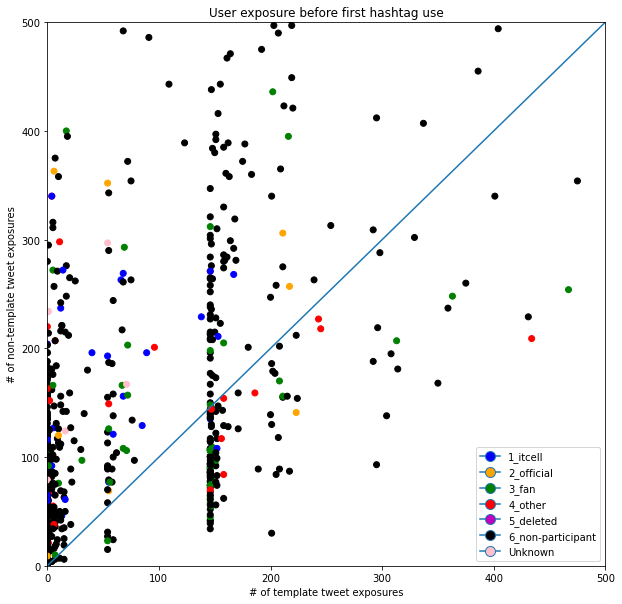

In [109]:
#t = [mdates.date2num(d) for d in f_dates]
cs = [color_map[user_df.type.get(u, 'Unknown')] for u in f_usernames] 
fig, ax = plt.subplots(figsize=(10,10))
sc = ax.scatter(f_temps, f_norms, c=cs)

#loc = mdates.AutoDateLocator()
#fig.colorbar(sc, ticks=loc,
#                 format=mdates.AutoDateFormatter(loc))


plt.title('User exposure before first hashtag use')
plt.xlabel('# of template tweet exposures')
plt.ylabel('# of non-template tweet exposures')
plt.xlim([0, 500])
plt.ylim([0, 500])

plt.plot([0,4000],[0,4000],'-')
# plt.xscale('log')
# plt.yscale('log')
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
legend_elems = [Line2D([0], [0], marker='o', label=key, markerfacecolor=value, markersize=10) for key,value in color_map.items()]

plt.legend(handles=legend_elems)
plt.show()